In [1]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

In [2]:
import numpy as np
import sklearn
import glob
import pandas as pd

#import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
!pwd

/home/nfs/rmadaj/IDUB/dc2_oligo


In [3]:
df = pd.read_csv("model/results.csv", index_col=0)
df

,pdb,cc_cov,chains,cc_sequence,full_sequence,full_seq_corr,cc_seq_corr,parallel,register,y,y_pred,prob_dimer,prob_trimer,prob_tetramer
0,3e7k,0.851852,4,TFERVEQMSIQIKEVGDRVNYIKRSLQSLDSQIGHLQDLSALTVDT,SRVTFERVEQMSIQIKEVGDRVNYIKRSLQSLDSQIGHLQDLSALT...,True,False,False,defgabcdefgabcdefgabcdefgabcdefgabcdefgabcdefg,2,2,0.009056,0.051386,0.119558
1,6us8,0.826087,4,LVVAASIIGILHLILWILD,DPLVVAASIIGILHLILWILDRL,True,False,True,cdefgabcabcdefgdefg,2,2,0.000044,0.047324,0.152632
2,5kht,0.893617,2,DAIKKKMQMLKLDKENALDRAEQAEADNYHLENEVARLKKL,GMDAIKKKMQMLKLDKENALDRAEQAEADNYHLENEVARLKKLVGER,False,True,True,bcdefgabcdefgabcdefgabcdefgabcdefgabcdefg,0,0,0.132453,0.000516,0.027030
3,5c9n,0.671875,2,CSWEEAQLSSQLYRNKQLQDTLVQKEEELARLHEENNHLRQYL,LPDLCSWEEAQLSSQLYRNKQLQDTLVQKEEELARLHEENNHLRQY...,True,False,True,abcdefgabcdefgabcdefgabcdefgabcdefgabcdefga,0,0,0.115096,0.005443,0.019461
4,3a2a,0.878049,2,LLRLKQMNVQLAAKIQHLEFSCSEKEQEIERLNKLL,RQLLRLKQMNVQLAAKIQHLEFSCSEKEQEIERLNKLLRQH,False,False,True,abcdefgabcdefgabcdefgabcdefgabcdefga,0,0,0.139122,0.011152,0.009727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,4nj1,0.806452,2,MKQLEDKIEELLSKNYHLENEIARL,RMKQLEDKIEELLSKNYHLENEIARLKKLVG,True,False,True,abcdefgabcdefgabcdefgabcd,0,0,0.135587,0.037902,0.006511
212,5kb1,0.888889,3,WEALEKKLAALESKCQALEKKLQALEKKHEAL,EWEALEKKLAALESKCQALEKKLQALEKKHEALEHG,False,False,True,abcdefgabcdefgabcdefgabcdefgabcd,1,1,0.017693,0.182808,0.039499
213,4h22,0.876543,2,YKKAMVSNAQLDNEKTNFMYQVDTLKDMLLELEEQLAESRRQYEEK...,EEKYKKAMVSNAQLDNEKTNFMYQVDTLKDMLLELEEQLAESRRQY...,True,False,True,abcdefgabcdefgabcdefgabcdefgabcdefgabcdefgabcd...,0,0,0.158303,0.000707,0.000990
214,1kyc,0.800000,3,LRRRIEELERRI,EELRRRIEELERRIR,False,False,True,defgabcdefga,1,1,0.004360,0.133106,0.022534


Accuracy:  0.8287037037037037


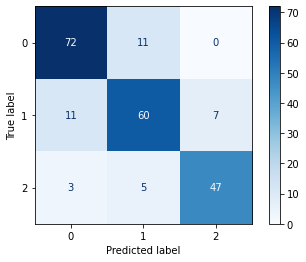

In [9]:
ConfusionMatrixDisplay.from_predictions(df["y"], df["y_pred"], cmap='Blues')
#calculate acc and f1
print("Accuracy: ", accuracy_score(df["y"], df["y_pred"]))


In [5]:
confusion_matrix(df["y"], df["y_pred"])

array([[84,  6,  5],
       [ 7, 74,  8],
       [ 3,  7, 52]])

In [21]:
len(df)

246

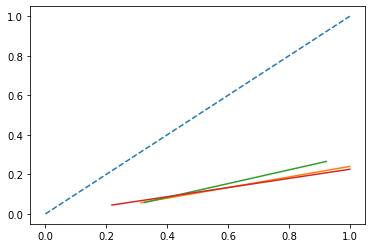

In [5]:
plt.plot([0, 1], [0, 1], linestyle='--')
for pr, i in zip(["prob_dimer", "prob_trimer", "prob_tetramer"], [0, 1, 2]):
    xc, yc = calibration_curve([1 if y_ == i else 0 for y_ in df["y"].values], df[pr].values, n_bins=5)
    plt.plot(xc, yc)

In [6]:
len(df), len(df.pdb.unique())

(216, 216)

In [30]:
!pwd

/home/nfs/jludwiczak/af2_cc/af2_multimer


In [24]:
df_ref = pd.read_csv("in/set4_with_logicoil_coconat.csv", index_col=0)

In [25]:
len(df_ref)

248

In [26]:
df_ref["y_pred_logicoil"] = np.argmax(df_ref[['Parallel Dimer', 'Tetramer', 'Trimer', 'Antiparallel dimer']].values, axis=1)
df_ref["y_pred_logicoil"] = df_ref["y_pred_logicoil"].apply(lambda x: x if x != 3 else 0)
df = pd.merge(df, df_ref, left_on="pdb", right_index=True)

In [28]:
df

,pdb,cc_cov_x,chains_x,cc_sequence_x,full_sequence_x,full_seq_corr_x,cc_seq_corr_x,parallel_x,y,y_pred,...,Antiparallel dimer,Parallel Dimer,Trimer,Tetramer,Test Sequence length,register,logicoil_seq,seq_length_difference,y_pred_coconat,y_pred_logicoil
0,3e7k,0.851852,4,TFERVEQMSIQIKEVGDRVNYIKRSLQSLDSQIGHLQDLSALTVDT,SRVTFERVEQMSIQIKEVGDRVNYIKRSLQSLDSQIGHLQDLSALT...,True,False,False,2,1,...,0.920439,0.873553,2.239204,1.190639,46,defgabcdefgabcdefgabcdefgabcdefgabcdefgabcdefg,TFERVEQMSIQIKEVGDRVNYIKRSLQSLDSQIGHLQDLSALTVDT,0,1.0,2
1,1use,0.550000,4,YSDLQRVKQELLEEVKKELQKV,SSDYSDLQRVKQELLEEVKKELQKVKEEIIEAFVQELRKR,False,False,True,2,2,...,0.977998,1.110243,0.905966,0.906184,22,abcdefgabcdefgabcdefga,YSDLQRVKQELLEEVKKELQKV,0,NaN,0
2,6us8,0.826087,4,LVVAASIIGILHLILWILD,DPLVVAASIIGILHLILWILDRL,True,False,True,2,2,...,1.093802,0.722218,1.441415,0.779629,19,gabcdefgabcdefgabcd,LVVAASIIGILHLILWILD,0,NaN,2
3,5kht,0.893617,2,DAIKKKMQMLKLDKENALDRAEQAEADNYHLENEVARLKKL,GMDAIKKKMQMLKLDKENALDRAEQAEADNYHLENEVARLKKLVGER,False,True,True,0,0,...,0.872560,1.282056,1.080260,1.124592,42,abcdefgabcdefgabcdefgabcdefgabcdefgabcdefg,MDAIKKKMQMLKLDKENALDRAEQAEADNYHLENEVARLKKL,1,0.0,0
4,5c9n,0.671875,2,CSWEEAQLSSQLYRNKQLQDTLVQKEEELARLHEENNHLRQYL,LPDLCSWEEAQLSSQLYRNKQLQDTLVQKEEELARLHEENNHLRQY...,True,False,True,0,0,...,0.879932,1.454100,0.795436,0.729975,43,abcdefgabcdefgabcdefgabcdefgabcdefgabcdefga,CSWEEAQLSSQLYRNKQLQDTLVQKEEELARLHEENNHLRQYL,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,5kb1,0.888889,3,WEALEKKLAALESKCQALEKKLQALEKKHEAL,EWEALEKKLAALESKCQALEKKLQALEKKHEALEHG,False,False,True,1,1,...,0.955279,1.023467,0.834725,1.409762,32,abcdefgabcdefgabcdefgabcdefgabcd,WEALEKKLAALESKCQALEKKLQALEKKHEAL,0,NaN,1
244,4h22,0.876543,2,YKKAMVSNAQLDNEKTNFMYQVDTLKDMLLELEEQLAESRRQYEEK...,EEKYKKAMVSNAQLDNEKTNFMYQVDTLKDMLLELEEQLAESRRQY...,True,False,True,0,0,...,0.980932,1.111608,0.948640,0.848414,71,abcdefgabcdefgabcdefgabcdefgabcdefgabcdefgabcd...,YKKAMVSNAQLDNEKTNFMYQVDTLKDMLLELEEQLAESRRQYEEK...,0,0.0,0
245,1kyc,0.800000,3,LRRRIEELERRI,EELRRRIEELERRIR,False,False,True,1,1,...,0.000000,0.000000,0.000000,0.000000,0,defgabcdefga,LRRRIEELERRI,0,NaN,0
246,2zfc,0.909091,3,LVQQQNNILRALEATQHAVQALVWGVKQLQARVLALERYI,VSGLVQQQNNILRALEATQHAVQALVWGVKQLQARVLALERYIK,False,False,True,1,1,...,0.921845,1.006125,1.192171,1.492111,40,defgabcdefgabcdefgabcdefgabcdefgabcdefga,LVQQQNNILRALEATQHAVQALVWGVKQLQARVLALERYI,0,1.0,1


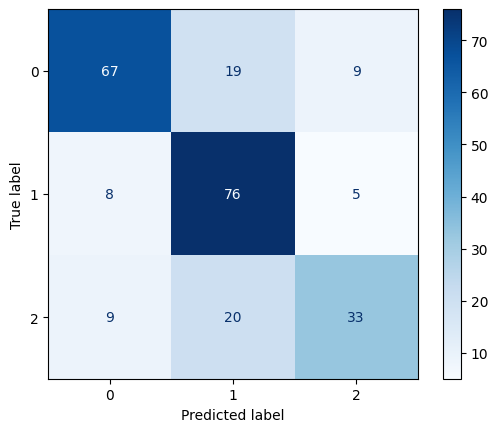

In [27]:
ConfusionMatrixDisplay.from_predictions(df["y"], df["y_pred_logicoil"], cmap='Blues')

In [11]:
f1_score(df["y"], df["y_pred"], average="macro"), f1_score(df["y"], df["y_pred_logicoil"], average="macro")

(0.8495652058644184, 0.6997353261089856)

In [12]:
df = df[df["logicoil_seq"].str.len() >= 40]

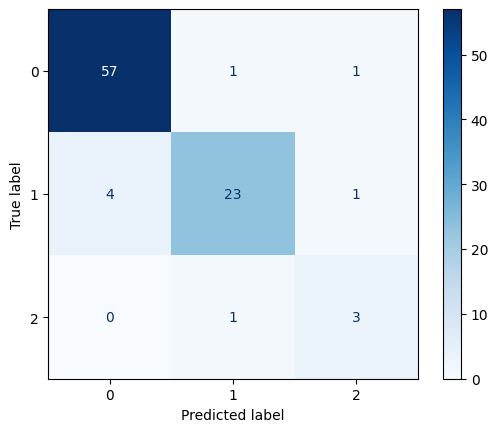

In [13]:
ConfusionMatrixDisplay.from_predictions(df["y"], df["y_pred"], cmap='Blues')

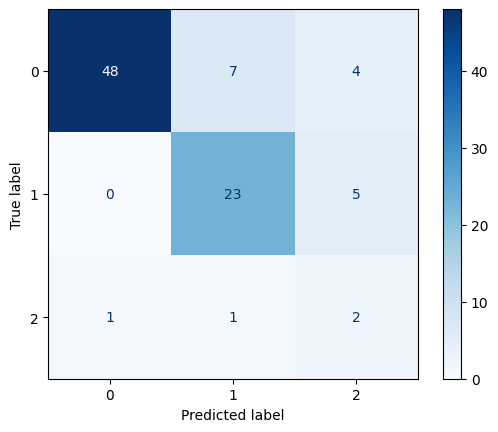

In [14]:
ConfusionMatrixDisplay.from_predictions(df["y"], df["y_pred_logicoil"], cmap='Blues')

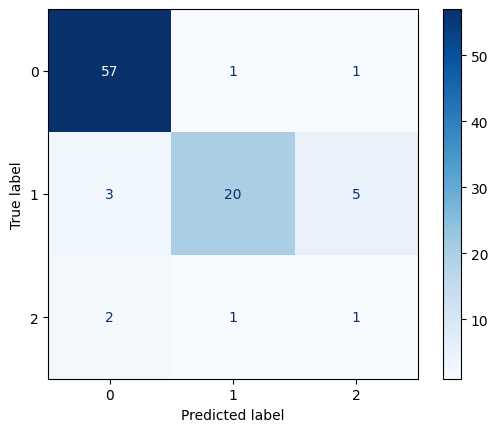

In [15]:
ConfusionMatrixDisplay.from_predictions(df["y"], df["y_pred_coconat"], cmap='Blues')

In [16]:
f1_score(df["y"], df["y_pred"], average="macro"), f1_score(df["y"], df["y_pred_logicoil"], average="macro"), f1_score(df["y"], df["y_pred_coconat"], average="macro")

(0.8281970649895177, 0.6450721908349027, 0.6413223140495868)